# Testes para modelo preditivo de variável Next_Tmax dos dados da base Bias_correction_ucl.csv

**Este notebook foi executado em um ambiente do Colab, tendo em vista a disponibilidade de recursos computacionais ser maior que em qualquer uma de minhas máquinas locais.**

Este notebook apresenta os testes realizados na escolha do melhor modelo para predição da variável 'Next_Tmax', conforme solicitado. Com este propósito a bilioteca Pycaret foi utilizada para otimizar o setup de testes de modelos, treinamento e validação. A análise sobre o melhor modelo é feita com base nas métricas de **R2, MSE, RMSE** e é apresentada em sequência às atividades realizadas. Este notebook está dividido entre:
1. Criação do modelo base
    1. Comparação entre modelos e escolha dos 3 melhores de acordo com as métricas propostas
    2. Tuning de modelos selecionados
    3. Escolha do melhor modelo
2. Utilização de seleção de features e remoção de multicolinearidade para otimização do modelo
    1. Comparação entre os modelos e escolha dos 3 melhores
    2. Tuning dos modelos
    3. Escolha do melhor modelo com seleção de features
3. Teste de setup com features selecionadas manualmente observando correlação

In [ ]:
!pip install -q pycaret
from pycaret.utils import enable_colab
enable_colab()
import pandas as pd
from pycaret.regression import *
from pycaret.utils import check_metric

     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 15.5 MB 33.3 MB/s 
     |████████████████████████████████| 113 kB 18.2 MB/s 
     |████████████████████████████████| 1.7 MB 34.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 31.3 MB/s 
     |████████████████████████████████| 2.0 MB 44.3 MB/s 
     |████████████████████████████████| 261 kB 50.5 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 33.5 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 10.1 MB 42.2 MB/s 
     |████████████████████████████████| 3.1 MB 37.3 MB/s 
     |████████████████

In [ ]:
df = pd.read_csv('drive/MyDrive/Trabalho/CESAR/Bias_correction_ucl_treated.csv', sep=',')
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.drop('Next_Tmin', axis=1, inplace=True)

Divisão do dataset em conjuntos de treino/teste e de validação 

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_validation = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_validation.reset_index(drop=True, inplace=True)


### Criação de modelo de baseline e tuning 

In [ ]:
setup_baseline = setup(data = data, train_size=.7, target = 'Next_Tmax', session_id=222,
                  log_experiment = True, experiment_name = 'CESAR Challenge', ignore_features = ['Date'])

Description            Value
0                               session_id              222
1                                   Target        Next_Tmax
2                            Original Data       (6975, 20)
3                           Missing Values            False
4                         Numeric Features               18
5                     Categorical Features                0
6                         Ordinal Features            False
7                High Cardinality Features            False
8                  High Cardinality Method             None
9                    Transformed Train Set       (4882, 18)
10                    Transformed Test Set       (2093, 18)
11                      Shuffle Train-Test             True
12                     Stratify Train-Test            False
13                          Fold Generator            KFold
14                             Fold Number               10
15                                CPU Jobs               -1
16                                 Use GPU            False
17                          Log Experiment             True
18                         Experiment Name  CESAR Challenge
19                                     USI             8518
20                         Imputation Type           simple
21          Iterative Imputation Iteration             None
22                         Numeric Imputer             mean
23      Iterative Imputation Numeric Model             None
24                     Categorical Imputer         constant
25  Iterative Imputation Categorical Model             None
26           Unknown Categoricals Handling   least_frequent
27                               Normalize            False
28                        Normalize Method             None
29                          Transformation            False
30                   Transformation Method             None
31                                     PCA            False
32                              PCA Method             None
33                          PCA Components             None
34                     Ignore Low Variance            False
35                     Combine Rare Levels            False
36                    Rare Level Threshold             None
37                         Numeric Binning            False
38                         Remove Outliers            False
39                      Outliers Threshold             None
40                Remove Multicollinearity            False
41             Multicollinearity Threshold             None
42             Remove Perfect Collinearity             True
43                              Clustering            False
44                    Clustering Iteration             None
45                     Polynomial Features            False
46                       Polynomial Degree             None
47                    Trignometry Features            False
48                    Polynomial Threshold             None
49                          Group Features            False
50                       Feature Selection            False
51                Feature Selection Method          classic
52            Features Selection Threshold             None
53                     Feature Interaction            False
54                           Feature Ratio            False
55                   Interaction Threshold             None
56                        Transform Target            False
57                 Transform Target Method          box-cox

In [ ]:
best = compare_models(sort = 'R2')

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.7043  0.8770  0.9355  0.9092   
lightgbm  Light Gradient Boosting Machine  0.7267  0.9209  0.9587  0.9045   
rf                Random Forest Regressor  0.7788  1.0840  1.0405  0.8877   
gbr           Gradient Boosting Regressor  0.9733  1.6285  1.2757  0.8312   
lr                      Linear Regression  1.1338  2.2744  1.5073  0.7642   
ridge                    Ridge Regression  1.1337  2.2743  1.5073  0.7642   
lar                Least Angle Regression  1.1338  2.2744  1.5073  0.7642   
br                         Bayesian Ridge  1.1337  2.2747  1.5074  0.7641   
ada                    AdaBoost Regressor  1.2453  2.4057  1.5508  0.7507   
dt                Decision Tree Regressor  1.1170  2.4735  1.5706  0.7431   
en                            Elastic Net  1.2548  2.6790  1.6361  0.7224   
huber                     Huber Regressor  1.2710  2.8111  1.6748  0.7083   
lasso                    Lasso Regression  1.2997  2.8278  1.6810  0.7071   
omp           Orthogonal Matching Pursuit  1.3462  3.0357  1.7416  0.6855   
knn                 K Neighbors Regressor  1.6938  4.7881  2.1867  0.5042   
par          Passive Aggressive Regressor  2.3021  8.4796  2.8219  0.1190   
llar         Lasso Least Angle Regression  2.5378  9.6721  3.1095 -0.0013   
dummy                     Dummy Regressor  2.5378  9.6721  3.1095 -0.0013   

           RMSLE    MAPE  TT (Sec)  
et        0.0306  0.0236     1.779  
lightgbm  0.0315  0.0245     0.239  
rf        0.0341  0.0262     3.798  
gbr       0.0418  0.0328     1.510  
lr        0.0494  0.0383     0.335  
ridge     0.0494  0.0383     0.018  
lar       0.0494  0.0383     0.021  
br        0.0494  0.0383     0.020  
ada       0.0509  0.0420     0.541  
dt        0.0513  0.0374     0.078  
en        0.0539  0.0427     0.021  
huber     0.0551  0.0432     0.134  
lasso     0.0555  0.0442     0.018  
omp       0.0568  0.0454     0.017  
knn       0.0720  0.0576     0.070  
par       0.0932  0.0792     0.050  
llar      0.1024  0.0867     0.019  
dummy     0.1024  0.0867     0.012

Olhando para as métricas escolhidas o modelo de Extra Trees Regressor performa melhor que os demais um score de R2 mais alto e os erros MSE e RMSE menores dentre os testados. Logo com base na baseline de treino poderiamos dizer que este modelos seria um dos mais indicados a ser utilizado para predição da variável em produção.

In [ ]:
lightgbm = create_model('lightgbm')
rf = create_model('rf')
et = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.6562  0.7481  0.8649  0.9214  0.0281  0.0219
1     0.6902  0.7990  0.8939  0.9156  0.0294  0.0232
2     0.7490  0.9916  0.9958  0.8976  0.0326  0.0250
3     0.6775  0.8136  0.9020  0.9200  0.0295  0.0228
4     0.7405  0.9947  0.9973  0.9011  0.0329  0.0249
5     0.7315  0.9362  0.9676  0.9004  0.0310  0.0243
6     0.6892  0.8450  0.9192  0.9087  0.0305  0.0234
7     0.6958  0.8837  0.9401  0.9033  0.0309  0.0235
8     0.7255  0.9179  0.9580  0.9103  0.0317  0.0245
9     0.6877  0.8399  0.9165  0.9131  0.0296  0.0229
Mean  0.7043  0.8770  0.9355  0.9092  0.0306  0.0236
SD    0.0288  0.0783  0.0418  0.0080  0.0014  0.0010

In [ ]:
tuned_et = tune_model(et, n_iter = 5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.9273  1.4731  1.2137  0.8453  0.0397  0.0312
1     0.9562  1.5831  1.2582  0.8328  0.0414  0.0324
2     1.0212  1.8377  1.3556  0.8101  0.0447  0.0344
3     0.9571  1.5362  1.2394  0.8490  0.0407  0.0324
4     1.0012  1.7725  1.3314  0.8238  0.0438  0.0338
5     0.9879  1.6080  1.2681  0.8289  0.0407  0.0329
6     0.9578  1.6007  1.2652  0.8271  0.0421  0.0327
7     0.9747  1.6769  1.2949  0.8165  0.0426  0.0330
8     1.0077  1.7539  1.3244  0.8286  0.0435  0.0341
9     0.9348  1.4820  1.2174  0.8467  0.0395  0.0314
Mean  0.9726  1.6324  1.2768  0.8309  0.0419  0.0328
SD    0.0298  0.1182  0.0461  0.0123  0.0017  0.0010

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter = 5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.7788  0.9960  0.9980  0.8954  0.0327  0.0262
1     0.8075  1.0677  1.0333  0.8872  0.0340  0.0272
2     0.8169  1.1540  1.0742  0.8808  0.0352  0.0273
3     0.7919  1.0867  1.0424  0.8932  0.0343  0.0267
4     0.7448  0.9328  0.9658  0.9073  0.0320  0.0252
5     0.7737  0.9849  0.9924  0.8952  0.0319  0.0256
6     0.8096  1.0257  1.0128  0.8892  0.0334  0.0274
7     0.7722  1.0805  1.0395  0.8818  0.0342  0.0261
8     0.8112  1.1071  1.0522  0.8918  0.0345  0.0273
9     0.8277  1.1395  1.0675  0.8822  0.0351  0.0279
Mean  0.7934  1.0575  1.0278  0.8904  0.0337  0.0267
SD    0.0243  0.0675  0.0330  0.0077  0.0011  0.0008

In [ ]:
tuned_rf = tune_model(rf, n_iter = 5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.9037  1.4195  1.1914  0.8509  0.0391  0.0305
1     0.9073  1.4479  1.2033  0.8470  0.0397  0.0307
2     0.9583  1.6078  1.2680  0.8339  0.0417  0.0321
3     0.9278  1.4337  1.1974  0.8591  0.0393  0.0314
4     0.9715  1.6829  1.2973  0.8327  0.0429  0.0328
5     0.9317  1.4927  1.2218  0.8411  0.0392  0.0309
6     0.9236  1.5304  1.2371  0.8347  0.0411  0.0315
7     0.9164  1.5652  1.2511  0.8287  0.0414  0.0309
8     0.9709  1.6263  1.2753  0.8411  0.0421  0.0328
9     0.9076  1.4153  1.1897  0.8536  0.0388  0.0305
Mean  0.9319  1.5222  1.2332  0.8423  0.0405  0.0314
SD    0.0247  0.0906  0.0366  0.0096  0.0014  0.0008

Observando os resultados, pode-se ver que o melhor modelo é o de Extra Trees para ambos os casos com tuning e sem tuning. Contudo utilizando o modelo sem nenhum tuning de hiperparâmetros com gridsearch e sem seleção de features temos o melhor resultado. Logo para uma primeira abordagem seria a melhor escolha. É válido ressaltar que o número de iterações utilizado para tuning foi baixo dadas as limitações de tempo e hardware, com um hardware mais potente e mais tempo para execução talvez conseguiria um modelo melhor dado o ajuste dos hiperparâmetros. 

#### Aplicação do modelo em teste e validação

In [ ]:
predict_model(et)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.6838  0.8202  0.9056  0.9161  0.0295  0.0228

station  Present_Tmax  Present_Tmin  ...  Solar radiation  Next_Tmax    Label
0        25.0     32.799999     25.700001  ...      5785.897949  34.500000  34.4520
1        11.0     26.299999     22.600000  ...      5039.804199  24.600000  24.7640
2        15.0     27.400000     25.299999  ...      5711.833496  25.299999  26.9260
3         4.0     26.000000     23.200001  ...      5776.879395  32.299999  30.2200
4        14.0     28.600000     21.799999  ...      4991.326660  30.900000  30.8320
...       ...           ...           ...  ...              ...        ...      ...
2088     10.0     26.100000     24.600000  ...      5591.034180  26.799999  27.4420
2089     25.0     35.000000     28.000000  ...      5234.533203  35.599998  34.8395
2090     17.0     27.100000     21.299999  ...      4836.728027  24.400000  24.4490
2091     14.0     27.299999     24.100000  ...      5413.715820  33.700001  33.3310
2092     18.0     34.000000     26.700001  ...      5413.949219  36.099998  34.7980

[2093 rows x 20 columns]

In [ ]:
final_et_baseline = finalize_model(et)
print(final_et_baseline)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=222, verbose=0, warm_start=False)


Aplicando modelo em conjunto de validação

In [ ]:
validation_predictions = predict_model(final_et_baseline, data=data_validation)
validation_predictions.head()

station       Date  Present_Tmax  ...  Solar radiation  Next_Tmax   Label
0      6.0 2013-06-30          31.9  ...      5873.780762       31.5  31.448
1      8.0 2013-06-30          32.1  ...      5863.992188       31.1  31.210
2     12.0 2013-06-30          31.6  ...      5924.328613       32.6  31.364
3     14.0 2013-06-30          31.3  ...      5857.949707       31.7  31.105
4     19.0 2013-06-30          31.4  ...      5893.578125       31.8  31.119

[5 rows x 21 columns]

In [ ]:
print("Scores obtained from the baseline model executed in validation data")
print("R2 score.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'R2'))
print("MAE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MAE'))
print("MSE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MSE'))
print("RMSE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'RMSE'))
print("MAPE.:", check_metric(validation_predictions.Next_Tmax, validation_predictions.Label, 'MAPE'))

Scores obtained from the baseline model executed in validation data
R2 score.: 0.9251
MAE.: 0.6635
MSE.: 0.7651
RMSE.: 0.8747
MAPE.: 0.0224


In [ ]:
#salvando modelo de baseline
save_model(final_et_baseline,'drive/MyDrive/Trabalho/CESAR/nxt_day_temp_prediction_et_22_12_2021_baseline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Date'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Next_Tmax',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

### Teste com Seleção de features e remoção de multicolinearidae

In [53]:
setup_feature_sel = setup(data = data, train_size=.7, target = 'Next_Tmax',
                  normalize = True, session_id=222, remove_multicollinearity = True, multicollinearity_threshold = 0.85,  feature_selection = True,
                  log_experiment = True, experiment_name = 'CESAR Challenge', ignore_features = ['Date'])

Description            Value
0                               session_id              222
1                                   Target        Next_Tmax
2                            Original Data       (6975, 20)
3                           Missing Values            False
4                         Numeric Features               18
5                     Categorical Features                0
6                         Ordinal Features            False
7                High Cardinality Features            False
8                  High Cardinality Method             None
9                    Transformed Train Set       (4882, 17)
10                    Transformed Test Set       (2093, 17)
11                      Shuffle Train-Test             True
12                     Stratify Train-Test            False
13                          Fold Generator            KFold
14                             Fold Number               10
15                                CPU Jobs               -1
16                                 Use GPU            False
17                          Log Experiment             True
18                         Experiment Name  CESAR Challenge
19                                     USI             9f03
20                         Imputation Type           simple
21          Iterative Imputation Iteration             None
22                         Numeric Imputer             mean
23      Iterative Imputation Numeric Model             None
24                     Categorical Imputer         constant
25  Iterative Imputation Categorical Model             None
26           Unknown Categoricals Handling   least_frequent
27                               Normalize             True
28                        Normalize Method           zscore
29                          Transformation            False
30                   Transformation Method             None
31                                     PCA            False
32                              PCA Method             None
33                          PCA Components             None
34                     Ignore Low Variance            False
35                     Combine Rare Levels            False
36                    Rare Level Threshold             None
37                         Numeric Binning            False
38                         Remove Outliers            False
39                      Outliers Threshold             None
40                Remove Multicollinearity             True
41             Multicollinearity Threshold             0.85
42             Remove Perfect Collinearity             True
43                              Clustering            False
44                    Clustering Iteration             None
45                     Polynomial Features            False
46                       Polynomial Degree             None
47                    Trignometry Features            False
48                    Polynomial Threshold             None
49                          Group Features            False
50                       Feature Selection             True
51                Feature Selection Method          classic
52            Features Selection Threshold              0.8
53                     Feature Interaction            False
54                           Feature Ratio            False
55                   Interaction Threshold             None
56                        Transform Target            False
57                 Transform Target Method          box-cox

In [54]:
best2 = compare_models(sort = 'R2')

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.6979  0.8624  0.9278  0.9106   
lightgbm  Light Gradient Boosting Machine  0.7209  0.8959  0.9457  0.9071   
rf                Random Forest Regressor  0.7779  1.0793  1.0382  0.8881   
knn                 K Neighbors Regressor  0.9601  1.6129  1.2690  0.8329   
gbr           Gradient Boosting Regressor  0.9686  1.6169  1.2712  0.8324   
lr                      Linear Regression  1.1336  2.2765  1.5080  0.7640   
ridge                    Ridge Regression  1.1335  2.2765  1.5080  0.7640   
lar                Least Angle Regression  1.1336  2.2765  1.5080  0.7640   
br                         Bayesian Ridge  1.1333  2.2765  1.5080  0.7640   
huber                     Huber Regressor  1.1306  2.2840  1.5104  0.7632   
ada                    AdaBoost Regressor  1.2498  2.4110  1.5523  0.7502   
dt                Decision Tree Regressor  1.1136  2.4438  1.5616  0.7462   
omp           Orthogonal Matching Pursuit  1.3462  3.0357  1.7416  0.6855   
en                            Elastic Net  1.4793  3.4716  1.8626  0.6405   
lasso                    Lasso Regression  1.6042  4.0337  2.0078  0.5825   
par          Passive Aggressive Regressor  1.9657  6.2379  2.4708  0.3539   
llar         Lasso Least Angle Regression  2.5378  9.6721  3.1095 -0.0013   
dummy                     Dummy Regressor  2.5378  9.6721  3.1095 -0.0013   

           RMSLE    MAPE  TT (Sec)  
et        0.0304  0.0234     1.697  
lightgbm  0.0311  0.0243     0.217  
rf        0.0341  0.0262     3.692  
knn       0.0416  0.0324     0.095  
gbr       0.0417  0.0327     1.336  
lr        0.0494  0.0383     0.023  
ridge     0.0494  0.0383     0.020  
lar       0.0494  0.0383     0.027  
br        0.0494  0.0383     0.023  
huber     0.0495  0.0382     0.059  
ada       0.0510  0.0421     0.528  
dt        0.0510  0.0373     0.076  
omp       0.0568  0.0454     0.018  
en        0.0617  0.0504     0.021  
lasso     0.0666  0.0547     0.020  
par       0.0814  0.0660     0.027  
llar      0.1024  0.0867     0.020  
dummy     0.1024  0.0867     0.014

In [55]:
et2 = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.6476  0.7246  0.8512  0.9239  0.0276  0.0217
1     0.6849  0.8062  0.8979  0.9148  0.0296  0.0231
2     0.7578  0.9980  0.9990  0.8969  0.0326  0.0253
3     0.6737  0.7935  0.8908  0.9220  0.0292  0.0227
4     0.7294  0.9292  0.9639  0.9077  0.0317  0.0245
5     0.7150  0.9010  0.9492  0.9041  0.0305  0.0238
6     0.6819  0.8439  0.9186  0.9089  0.0306  0.0232
7     0.6927  0.8820  0.9391  0.9035  0.0309  0.0233
8     0.7219  0.9239  0.9612  0.9097  0.0318  0.0244
9     0.6742  0.8223  0.9068  0.9150  0.0295  0.0225
Mean  0.6979  0.8624  0.9278  0.9106  0.0304  0.0234
SD    0.0310  0.0757  0.0409  0.0080  0.0014  0.0010

In [ ]:
et2

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=222, verbose=0, warm_start=False)

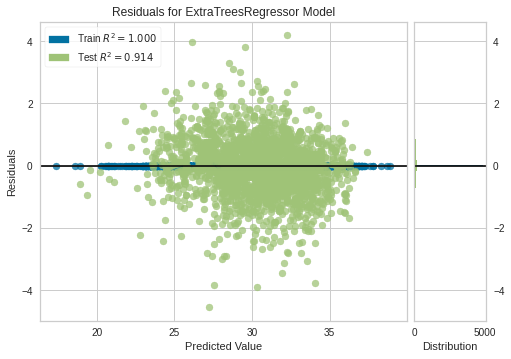

In [ ]:
plot_model(et2)

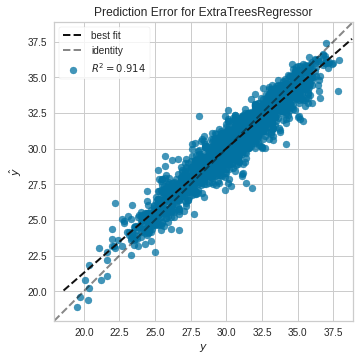

In [ ]:
plot_model(et2, plot = 'error')

O modelo proposto apresenta uma performance ótima se comparado aos demais, apresentando um melhor fiting à identidade para valores medianos e tendendo a um erro maior em valores extremos dentro da amostra observada. O modelo começa com um erro um pouco maior e vai tendendo a um acerto maior quanto mais se aproxima da média, como podemos observar na distribuição de valores da target ao plotarmos seu histograma no arquivo **data-analysis.ipynb**

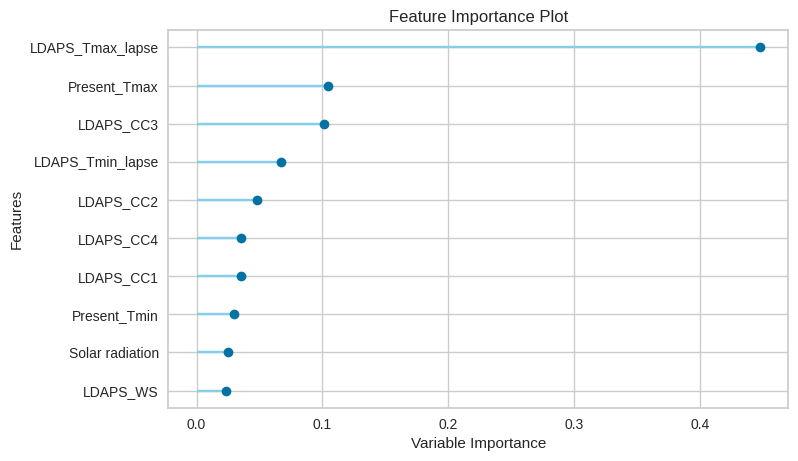

In [ ]:
plot_model(et2, plot='feature')

É interessante observar que a as variáveis consideradas mais importantes encontradas no modelo do pycaret seguem as selecionadas na análise feita sobre os dados, sendo a que apresenta maior importância a que também apresentou a maior correlação (**LDAPS_Tmax_lapse**). Isso se deve pelo fato do pycaret também considerar a correlação como um dos fatores determinantes para o calculo de importância da variável, assim validando também a análise feita.

#### Testando tunning do modelo com feature selection e multicolinearity removal

In [ ]:
tuning_et2 = tune_model(et2)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.8921  1.3618  1.1670  0.8569  0.0381  0.0299
1     0.9630  1.6201  1.2729  0.8288  0.0419  0.0326
2     0.9731  1.6797  1.2960  0.8265  0.0427  0.0327
3     0.9317  1.4315  1.1964  0.8593  0.0393  0.0315
4     0.9776  1.7051  1.3058  0.8305  0.0429  0.0330
5     0.9632  1.5162  1.2313  0.8386  0.0395  0.0320
6     0.9248  1.5043  1.2265  0.8375  0.0406  0.0315
7     0.9350  1.5834  1.2583  0.8267  0.0414  0.0316
8     0.9746  1.6437  1.2821  0.8394  0.0423  0.0330
9     0.8825  1.3359  1.1558  0.8619  0.0375  0.0296
Mean  0.9418  1.5382  1.2392  0.8406  0.0406  0.0317
SD    0.0327  0.1236  0.0502  0.0131  0.0018  0.0011

Observando os resultados do tuning aparentemente o modelo "cru" apresenta uma melhor performance contendo um MAE mais baixo e um score R2 mais alto o que indica uma melhor generalização do modelo. Logo, resolvi ficar com o modelo de Extra Tree Regressor com feature selection e remoção de colinearidades sem tuning

#### Avaliação do modelo no conjunto de teste e validação

Aplicando o modelo no conjunto de teste 

In [56]:
predict = predict_model(et2)
predict

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.6839  0.8188  0.9049  0.9162  0.0295  0.0228

Present_Tmin  LDAPS_RHmin  Solar radiation  ...       DEM  Next_Tmax    Label
0         1.028798    -2.426972         1.034153  ... -0.779161  34.500000  34.4140
1        -0.266646     1.197077        -0.706389  ... -0.612160  24.600000  24.6490
2         0.861644     0.124900         0.861370  ... -0.587493  25.299999  26.8880
3        -0.015914     1.023461         1.013114  ... -0.300420  32.299999  30.4070
4        -0.600954    -0.689313        -0.819481  ... -0.570609  30.900000  30.8460
...            ...          ...              ...  ...       ...        ...      ...
2088      0.569125     0.868172         0.579561  ...  2.681974  26.799999  27.4640
2089      1.989934    -0.517425        -0.252111  ... -0.779161  35.599998  34.7915
2090     -0.809897     2.132406        -1.180140  ... -0.158342  24.400000  24.4190
2091      0.360182    -0.753668         0.165900  ... -0.570609  33.700001  33.3920
2092      1.446683    -0.598530         0.166444  ... -0.103864  36.099998  35.1090

[2093 rows x 19 columns]

A seleção de feature auxilia na melhora do modelo ao permirtir que este tenha o conjunto ao remover variáveis redundântes e irrelevantes à predição, auxiliando na interpretabilidade do modelo melhora, reduzindo a possibilidade de overfitting do modelo. Deste modo, decidi optar pela seleção de features na perspectiva de obter um modelo mais preciso.

Finalizando modelo e aplicando no conjunto de validação 

In [ ]:
final_et_feat_sel = finalize_model(et2)

In [ ]:
print(final_et_feat_sel)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=222, verbose=0, warm_start=False)


In [ ]:
validation_predictions_feat_sel = predict_model(final_et_feat_sel, data=data_validation)
validation_predictions_feat_sel.head()

station       Date  Present_Tmax  ...  Solar radiation  Next_Tmax    Label
0      6.0 2013-06-30          31.9  ...      5873.780762       31.5  31.3740
1      8.0 2013-06-30          32.1  ...      5863.992188       31.1  31.1910
2     12.0 2013-06-30          31.6  ...      5924.328613       32.6  31.2365
3     14.0 2013-06-30          31.3  ...      5857.949707       31.7  31.1070
4     19.0 2013-06-30          31.4  ...      5893.578125       31.8  31.0830

[5 rows x 21 columns]

In [ ]:
print("Scores obtained from the model with feature selection executed in validation data")
print("R2 score.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'R2'))
print("MAE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MAE'))
print("MSE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MSE'))
print("RMSE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'RMSE'))
print("MAPE.:", check_metric(validation_predictions_feat_sel.Next_Tmax, validation_predictions_feat_sel.Label, 'MAPE'))

Scores obtained from the model with feature selection executed in validation data
R2 score.: 0.9258
MAE.: 0.659
MSE.: 0.7579
RMSE.: 0.8706
MAPE.: 0.0222


Apesar da diferença ser pequena ao analisarmos as métricas, é válido observar que o modelo com feature selection apresenta uma melhora ao utilizar menos features, diminuindo o espaço de variáveis o que em uma visão de engenharia representa um esforço menor para manutenção de variáveis e no próprio modelo.

In [ ]:
#salvando modelo com feature_selection
save_model(final_et_feat_sel,'drive/MyDrive/Trabalho/CESAR/nxt_day_temp_prediction_et_22_12_2021_feat_sel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Date'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Next_Tmax',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

### Teste de setup com features selecionadas manualmente observando correlação

In [ ]:
df = df[['Date','Present_Tmax', 'Present_Tmin','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_RHmin', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'Next_Tmax']]

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_validation = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_validation.reset_index(drop=True, inplace=True)

In [ ]:
setup_baseline = setup(data = data, train_size=.7, target = 'Next_Tmax', session_id=222,
                  log_experiment = True, experiment_name = 'CESAR Challenge', ignore_features = ['Date'])

Description            Value
0                               session_id              222
1                                   Target        Next_Tmax
2                            Original Data       (6975, 10)
3                           Missing Values            False
4                         Numeric Features                8
5                     Categorical Features                0
6                         Ordinal Features            False
7                High Cardinality Features            False
8                  High Cardinality Method             None
9                    Transformed Train Set        (4882, 8)
10                    Transformed Test Set        (2093, 8)
11                      Shuffle Train-Test             True
12                     Stratify Train-Test            False
13                          Fold Generator            KFold
14                             Fold Number               10
15                                CPU Jobs               -1
16                                 Use GPU            False
17                          Log Experiment             True
18                         Experiment Name  CESAR Challenge
19                                     USI             42a0
20                         Imputation Type           simple
21          Iterative Imputation Iteration             None
22                         Numeric Imputer             mean
23      Iterative Imputation Numeric Model             None
24                     Categorical Imputer         constant
25  Iterative Imputation Categorical Model             None
26           Unknown Categoricals Handling   least_frequent
27                               Normalize            False
28                        Normalize Method             None
29                          Transformation            False
30                   Transformation Method             None
31                                     PCA            False
32                              PCA Method             None
33                          PCA Components             None
34                     Ignore Low Variance            False
35                     Combine Rare Levels            False
36                    Rare Level Threshold             None
37                         Numeric Binning            False
38                         Remove Outliers            False
39                      Outliers Threshold             None
40                Remove Multicollinearity            False
41             Multicollinearity Threshold             None
42             Remove Perfect Collinearity             True
43                              Clustering            False
44                    Clustering Iteration             None
45                     Polynomial Features            False
46                       Polynomial Degree             None
47                    Trignometry Features            False
48                    Polynomial Threshold             None
49                          Group Features            False
50                       Feature Selection            False
51                Feature Selection Method          classic
52            Features Selection Threshold             None
53                     Feature Interaction            False
54                           Feature Ratio            False
55                   Interaction Threshold             None
56                        Transform Target            False
57                 Transform Target Method          box-cox

In [ ]:
best = compare_models(sort = 'R2')

Model     MAE     MSE    RMSE      R2  \
et                  Extra Trees Regressor  0.7971  1.1235  1.0595  0.8836   
rf                Random Forest Regressor  0.8585  1.3040  1.1414  0.8649   
lightgbm  Light Gradient Boosting Machine  0.8756  1.3105  1.1440  0.8641   
gbr           Gradient Boosting Regressor  1.0638  1.9000  1.3779  0.8030   
lr                      Linear Regression  1.1958  2.4594  1.5674  0.7451   
ridge                    Ridge Regression  1.1958  2.4594  1.5673  0.7451   
lar                Least Angle Regression  1.1958  2.4594  1.5674  0.7451   
br                         Bayesian Ridge  1.1958  2.4594  1.5673  0.7451   
huber                     Huber Regressor  1.1996  2.4685  1.5702  0.7441   
knn                 K Neighbors Regressor  1.1853  2.4943  1.5783  0.7411   
ada                    AdaBoost Regressor  1.2766  2.5505  1.5967  0.7358   
dt                Decision Tree Regressor  1.1430  2.5487  1.5938  0.7357   
en                            Elastic Net  1.3130  2.8663  1.6922  0.7030   
lasso                    Lasso Regression  1.3317  2.9307  1.7112  0.6965   
omp           Orthogonal Matching Pursuit  1.3462  3.0357  1.7416  0.6855   
par          Passive Aggressive Regressor  1.3981  3.3507  1.7895  0.6566   
llar         Lasso Least Angle Regression  2.5378  9.6721  3.1095 -0.0013   
dummy                     Dummy Regressor  2.5378  9.6721  3.1095 -0.0013   

           RMSLE    MAPE  TT (Sec)  
et        0.0346  0.0267     1.328  
rf        0.0374  0.0289     2.756  
lightgbm  0.0375  0.0294     0.151  
gbr       0.0451  0.0359     0.751  
lr        0.0512  0.0404     0.016  
ridge     0.0512  0.0404     0.015  
lar       0.0512  0.0404     0.017  
br        0.0512  0.0404     0.027  
huber     0.0513  0.0405     0.216  
knn       0.0518  0.0401     0.094  
ada       0.0524  0.0430     0.328  
dt        0.0521  0.0384     0.072  
en        0.0556  0.0445     0.017  
lasso     0.0563  0.0452     0.018  
omp       0.0568  0.0454     0.016  
par       0.0589  0.0473     0.040  
llar      0.1024  0.0867     0.017  
dummy     0.1024  0.0867     0.012

In [ ]:
et3 = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.7534  1.0156  1.0078  0.8933  0.0328  0.0252
1     0.7846  1.0851  1.0417  0.8854  0.0343  0.0264
2     0.8460  1.2174  1.1033  0.8742  0.0358  0.0281
3     0.7749  1.0869  1.0425  0.8932  0.0340  0.0260
4     0.8321  1.2497  1.1179  0.8758  0.0368  0.0281
5     0.8006  1.1042  1.0508  0.8825  0.0337  0.0266
6     0.7960  1.0819  1.0401  0.8832  0.0345  0.0270
7     0.8071  1.1368  1.0662  0.8756  0.0349  0.0271
8     0.8046  1.1554  1.0749  0.8871  0.0355  0.0271
9     0.7715  1.1018  1.0496  0.8861  0.0341  0.0258
Mean  0.7971  1.1235  1.0595  0.8836  0.0346  0.0267
SD    0.0264  0.0655  0.0307  0.0065  0.0011  0.0009

In [ ]:
tuned_et3 = tune_model(et3, n_iter = 5)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.0050  1.7236  1.3128  0.8189  0.0429  0.0338
1     1.0225  1.8125  1.3463  0.8085  0.0444  0.0347
2     1.0884  2.0849  1.4439  0.7846  0.0474  0.0365
3     1.0250  1.7503  1.3230  0.8280  0.0433  0.0347
4     1.0859  2.0603  1.4354  0.7952  0.0471  0.0366
5     1.0639  1.8215  1.3496  0.8061  0.0433  0.0354
6     1.0441  1.9212  1.3861  0.7925  0.0461  0.0357
7     1.0512  1.9170  1.3846  0.7902  0.0454  0.0355
8     1.0615  1.9738  1.4049  0.8071  0.0462  0.0359
9     0.9667  1.6252  1.2748  0.8319  0.0414  0.0325
Mean  1.0414  1.8690  1.3661  0.8063  0.0448  0.0351
SD    0.0357  0.1412  0.0518  0.0153  0.0019  0.0012

Plotando gráfico de resíduos estatísticos para o modelo 

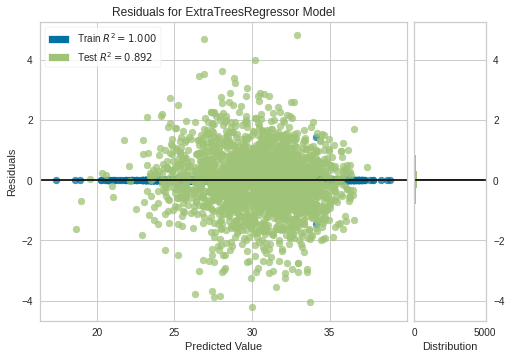

In [ ]:
plot_model(et3)

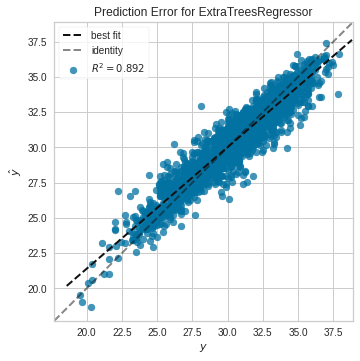

In [ ]:
plot_model(et3, plot = 'error')

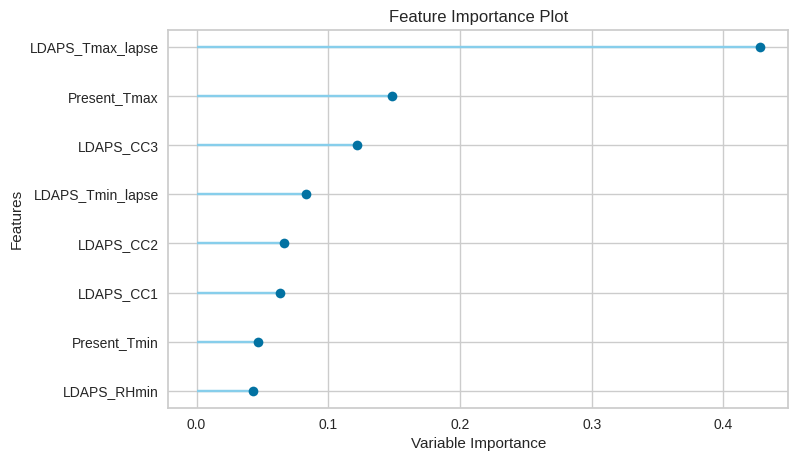

In [ ]:
plot_model(et3, plot='feature')

In [ ]:
predict_model(et3)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  0.7747  1.0603  1.0297  0.8915  0.0335  0.0259

Present_Tmax  Present_Tmin  ...  Next_Tmax    Label
0        32.799999     25.700001  ...  34.500000  34.2760
1        26.299999     22.600000  ...  24.600000  24.9620
2        27.400000     25.299999  ...  25.299999  27.5430
3        26.000000     23.200001  ...  32.299999  30.1640
4        28.600000     21.799999  ...  30.900000  30.9430
...            ...           ...  ...        ...      ...
2088     26.100000     24.600000  ...  26.799999  27.6970
2089     35.000000     28.000000  ...  35.599998  34.5350
2090     27.100000     21.299999  ...  24.400000  24.4310
2091     27.299999     24.100000  ...  33.700001  33.2140
2092     34.000000     26.700001  ...  36.099998  34.5375

[2093 rows x 10 columns]

In [ ]:
final_et_feat_sel_manual = finalize_model(et3)

Aplicando o modelo no conjunto de validação

In [ ]:
validation_predictions_feat_sel = predict_model(final_et_feat_sel_manual, data=data_validation)
validation_predictions_feat_sel.head()

Date  Present_Tmax  Present_Tmin  ...  LDAPS_CC3  Next_Tmax   Label
0 2013-06-30          31.9          23.5  ...   0.232841       31.5  31.783
1 2013-06-30          32.1          23.6  ...   0.272387       31.1  30.942
2 2013-06-30          31.6          22.2  ...   0.182102       32.6  31.055
3 2013-06-30          31.3          23.8  ...   0.241908       31.7  31.165
4 2013-06-30          31.4          22.8  ...   0.188506       31.8  31.233

[5 rows x 11 columns]

O modelo criado utilizando as variáveis observadas no notebook **data-analysis**, apesar de MSE, RMSE mais altos e score R2 inferior ao com seleção de features, apresenta um bom resultado se comparado à este e a baseline, tendo os erros médios menores e um score R2 maior que o modelo base. Por utilizar um número menor de variáveis preditoras (10 a menos neste caso) ele possibilita uma manutenção mais simples, além de que pode ser melhorado usando o tuning de hiperparâmetros e adicionando possíveis variáveis que levem a um modelo mais preciso. 


### Considerações Finais

Um fator a ser ressaltado é que não foi feito qualquer tipo de feature engineering neste projeto, logo, existe a possibilidade de utilizando de técnicas de combinação de features pode-se obter variáveis que representem melhor a problemática ao modelo. Fiz teste utilizando a flag de timeseries do pycaret, contudo o resultado obtido foi inferior, logo descartei a ideia após testes preliminares e mantive a abordagem tradicional. 

Outra abordagem interessante seria testes com a utilização de RNN's, como GRU ou LSTM, para a predição da série temporal, tendo em vista que estes modelos de redes neurais são sensíveis a variações temporais nos dados. Contudo, devido a pequena quantidade de dados seria dificil se ter um modelo que apresentasse uma boa performance já que seu conjunto de treinamento seria ínfimo. 

Por fim, uma das possibilidades seria a utilização de um numero maior de iterações no tuning de hiperparâmetros, pois dada a limitação de hardware e tempo utilizei 5 interações que já está abaixo do aconselhado recomendado como base, que são 10. É possível que com números maiores de iteralções os parâmetros sejam melhor ajustados e o modelo apresente uma performance superior a atual.